<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP5_EyaBENNESSIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from psutil import * 
cpu_count() # indique le nombre de CPU 
!lscpu |grep 'Model name' # CPU mode and speed 
!df –h / | awk '{print $4}' # available Hard disk space 
!free –h –si | awk '/Mem:/{print $2}' # Usuable memory 
!nvidia-smi –L # GPU specifications.

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
df: –h: No such file or directory
Available
69024516
13302920
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from pandas import read_csv 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 

In [10]:
df = read_csv("housing_data_for_regression.csv", delim_whitespace=True, header=None)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV'] 
df.columns = feature_names

In [13]:
print(df.head()) 

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [14]:
df = df.rename(columns={'MEDV': 'PRICE'}) 
print(df.describe()) 

             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [15]:
X = df.drop('PRICE', axis = 1) 
y = df['PRICE'] 

Exercice 2 : Construction et entrainement du modèle 


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20) 

In [17]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
#Standardisez les fonctionnalités en supprimant la moyenne et en mettant à l’échelle la variance unitaire.

In [18]:
model = Sequential() 
model.add(Dense(128, input_dim=13, activation='relu')) #premiere couche du réseau (d'entrée)
model.add(Dense(64, activation='relu')) #2eme couche
model.add(Dense(1, activation='linear')) #couche de sortie

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100) 

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 571.0901 - mae: 22.0112 - val_loss: 587.1077 - val_mae: 22.2071
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 510.0586 - mae: 20.6100 - val_loss: 508.3041 - val_mae: 20.4819
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 430.6364 - mae: 18.6535 - val_loss: 404.6155 - val_mae: 17.9454
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 333.8056 - mae: 15.9346 - val_loss: 275.9945 - val_mae: 14.4014
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 217.4471 - mae: 12.3126 - val_loss: 151.9426 - val_mae: 10.2972
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 126.1787 - mae: 8.6688 - val_loss: 76.3153 - val_mae: 6.9685
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 80.8950 - mae: 6.7290 - val_loss: 50.6402 - val_mae: 5.6966
Epoch 8/100
11/11 [============================

In [21]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =20) 

Epoch 1/20
11/11 [==============================] - 0s 17ms/step - loss: 6.6529 - mae: 1.8422 - val_loss: 9.8777 - val_mae: 2.5154
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 6.4964 - mae: 1.8196 - val_loss: 10.3258 - val_mae: 2.4793
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 6.3855 - mae: 1.7978 - val_loss: 10.1493 - val_mae: 2.5084
Epoch 4/20
11/11 [==============================] - 0s 10ms/step - loss: 6.3276 - mae: 1.7923 - val_loss: 10.3250 - val_mae: 2.5122
Epoch 5/20
11/11 [==============================] - 0s 17ms/step - loss: 6.1880 - mae: 1.7707 - val_loss: 10.2379 - val_mae: 2.4762
Epoch 6/20
11/11 [==============================] - 0s 23ms/step - loss: 6.3750 - mae: 1.7860 - val_loss: 9.9542 - val_mae: 2.4671
Epoch 7/20
11/11 [==============================] - 0s 17ms/step - loss: 6.2136 - mae: 1.7814 - val_loss: 9.7949 - val_mae: 2.4550
Epoch 8/20
11/11 [==============================] - 0s 16ms/step - loss: 6.1198 -

In [22]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =30) 

Epoch 1/30
11/11 [==============================] - 0s 8ms/step - loss: 5.6427 - mae: 1.7371 - val_loss: 9.2002 - val_mae: 2.3585
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 5.4126 - mae: 1.6987 - val_loss: 9.3526 - val_mae: 2.3631
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 5.2700 - mae: 1.6607 - val_loss: 9.1318 - val_mae: 2.4032
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 5.3640 - mae: 1.6947 - val_loss: 9.1495 - val_mae: 2.3610
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 5.2651 - mae: 1.6698 - val_loss: 9.5950 - val_mae: 2.3842
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 5.4522 - mae: 1.7098 - val_loss: 9.3342 - val_mae: 2.3966
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 5.1881 - mae: 1.6704 - val_loss: 9.0491 - val_mae: 2.3741
Epoch 8/30
11/11 [==============================] - 0s 6ms/step - loss: 5.1543 - mae: 1.67

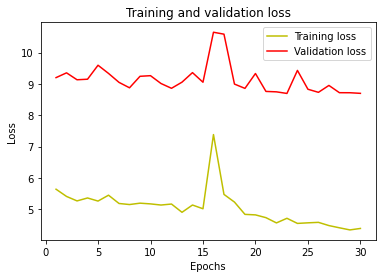

In [23]:
from matplotlib import pyplot as plt 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'y', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

on peut voir avec cette graphe que la courbe en rouge (validation loss) a des valeurs de la fonction loss plus elevées que la courbe en vert ( training loss) ce qui est tout à fait normal. on peut voir qu'après 30 epochs la fonction loss nous indique une erreur de 9 tant que l'autre est proche de 0.

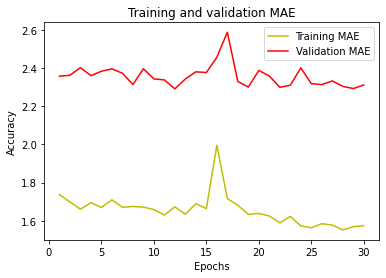

In [28]:
acc = history.history['mae'] 
val_acc = history.history['val_mae'] 
plt.plot(epochs, acc, 'y', label='Training MAE') 
plt.plot(epochs, val_acc, 'r', label='Validation MAE') 
plt.title('Training and validation MAE') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

Maintenant, on compare la valeur de l'erreur absolue moyenne entre la courbe de training set et de validation set. On peut constater que l'erreur ne s'annule pas et et la data set de training est plus proche de 0 que la data set de validation.

In [29]:
predictions = model.predict(X_test_scaled[:5]) 
print("Predicted values are: ", predictions) 
print("Real values are: ", y_test[:5]) 

Predicted values are:  [[19.222294]
 [20.048431]
 [21.013157]
 [20.815168]
 [12.67321 ]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [30]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test) 
print('Mean squared error from neural net: ', mse_neural) 
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 4ms/step - loss: 13.8309 - mae: 2.7557
Mean squared error from neural net:  13.830933570861816
Mean absolute error from neural net:  2.755727767944336


Exercice 4 : Comparaison des performances 
Les performances de ce réseau de neurones profonds sont comparées à des algorithmes classiques 
d’apprentissage statistique (régréssion linéaire, arbre de decision, random Forest). 


In [31]:
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
lr_model = linear_model.LinearRegression() #choisir un modèle : regression linéaire
lr_model.fit(X_train_scaled, y_train) #entrainer le modèle
y_pred_lr = lr_model.predict(X_test_scaled) # faire la prédiction

In [35]:
mse_lr = mean_squared_error(y_test, y_pred_lr) 
mae_lr = mean_absolute_error(y_test, y_pred_lr) 
print('Mean squared error from linear regression: ', mse_lr) 
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.49535197593167
Mean absolute error from linear regression:  3.055894153890959


RN : (Mean squared error from neural net:  13.830933570861816
Mean absolute error from neural net:  2.755727767944336)

modele LinR : (Mean squared error from linear regression:  16.49535197593167
Mean absolute error from linear regression:  3.055894153890959)

le réseau de neurones est plus performent que la modèle de Regression linéaire parce qu'il nous donne le moindre erreur

In [36]:
tree = DecisionTreeRegressor() 
tree.fit(X_train_scaled, y_train) 
y_pred_tree = tree.predict(X_test_scaled)

In [37]:
mse_dt = mean_squared_error(y_test, y_pred_tree) 
mae_dt = mean_absolute_error(y_test, y_pred_tree) 
print('Mean squared error using decision tree: ', mse_dt) 
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  26.025294117647068
Mean absolute error using decision tree:  3.301960784313725


le réseaux de neurones est plus performant que l'Arbres de décision

In [38]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators = 30, random_state=30) 
model.fit(X_train_scaled, y_train) 
y_pred_RF = model.predict(X_test_scaled)

In [39]:
mse_RF = mean_squared_error(y_test, y_pred_RF) 
mae_RF = mean_absolute_error(y_test, y_pred_RF) 
print('Mean squared error using Random Forest: ', mse_RF) 
print('Mean absolute error Using Random Forest: ', mae_RF) 

Mean squared error using Random Forest:  12.701104793028327
Mean absolute error Using Random Forest:  2.408235294117647


Random Forest pour une 30 d'arbre donne moins d'erreurs que le réseau de neuronespour avec 30 epochs